In [24]:
library(ggplot2)
library(dplyr)
library(reshape2)
library(tidyr)
library(DOSE)
library(ggsci)
library(ggforce)
library(ggpubr)
library(stringr)
library(wesanderson)
library(ggdendro)

## Figure 3a

In [3]:
path <- "/Users/dmitriismirnov/Dropbox/Projects/optimalTAD/Results/Li_2015/New/Imputation/amplitudes.csv"

In [5]:
data <- read.csv(path)

In [6]:
colnames(data) <- c('Gamma', 'BEAF-32 Rep2', 'CBP Rep2', 'CBP Rep1', 'CBP Rep3', 'CP190 Rep2', 
                    'CTCF Rep2', 'CapH2 Rep2', 'CapH2 Rep1', 'Chromator Rep2', 'Chromator Rep1', 'Fs1h.L Rep1', 
                    'H3K4me1 Rep2', 'H3K4me3 Rep2', 'H3K9me2 Rep1', 'L(3)mbt Rep1', 'Pc-RJ Rep1', 
                    'Pc-VP Rep1', 'RNAPII Rep1', 'Rad21 Rep2', 'Rad21 Rep1', 
                    'Rad21 Rep3', 
                    'TFIIIC Rep2', 
                    'TFIIIC Rep1', 'Z4 Rep1')

In [7]:
data <- melt(data, id.vars = 'Gamma')

In [8]:
data <- data %>% separate(variable, c('Protein', 'Replicate'), sep = ' ')

In [9]:
data$Protein <- factor(data$Protein, levels = c('BEAF-32', 'Chromator', 'H3K4me3', 'RNAPII', 
                     'CapH2', 'CBP', 'H3K4me1', 'CP190', 
                     'L(3)mbt', 'Rad21',  'Fs1h.L', 'Z4',
                     'TFIIIC', 'H3K9me2',  'Pc-RJ', 'Pc-VP',
                     'CTCF'))

In [10]:
rep_vect <- data$Replicate
rep_vect <- str_replace(rep_vect, pattern = 'Rep1', replacement = 'Rep. 1')
rep_vect <- str_replace(rep_vect, pattern = 'Rep2', replacement = 'Rep. 2')
rep_vect <- str_replace(rep_vect, pattern = 'Rep3', replacement = 'Rep. 3')
data$Replicate <- rep_vect

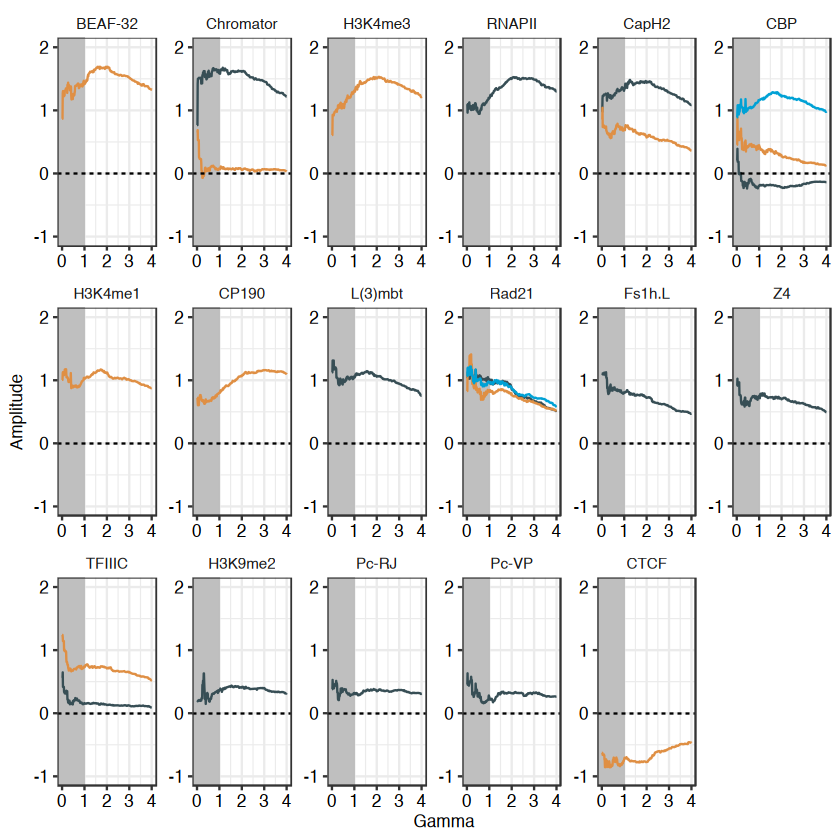

In [13]:
ggplot(data, aes(x = Gamma, y = value, color = Replicate))+
    geom_rect(aes(xmin = -Inf, xmax = 0.97, 
                  ymin = -Inf, ymax = Inf), 
                  fill = "grey", color = 'grey',
                  #fill = wes_palette("GrandBudapest2")[4], 
                  alpha = 0.1) +
    geom_line()+
    facet_wrap(~Protein, scales = "free", nrow = 3, ncol = 6)+
    theme_dose(10)+
    scale_color_jama()+
    geom_hline(yintercept = 0, linetype='dashed')+
    ylim(-1,2)+ylab('Amplitude')+
    theme(legend.position = 'none',
          strip.background = element_blank()
          #strip.text.x = element_blank()
    )

## Figure 3c

In [16]:
ampl <- read.csv("../../Results/Li_2015/New/Imputation/amplitudes.csv")

In [17]:
colnames(ampl) <- c('Gamma', 'BEAF-32 Rep. 2', 'CBP Rep. 2', 'CBP Rep. 1', 'CBP Rep. 3', 'CP190 Rep. 2', 
                    'CTCF Rep. 2', 'CapH2 Rep. 2', 'CapH2 Rep. 1', 'Chromator Rep. 2', 'Chromator Rep. 1', 
                    'Fs1h.L Rep. 1', 
                    'H3K4me1 Rep. 2', 'H3K4me3 Rep. 2', 'H3K9me2 Rep. 1', 'L(3)mbt Rep. 1', 'Pc-RJ Rep. 1', 
                    'Pc-VP Rep. 1', 'RNAPII Rep. 1', 'Rad21 Rep. 2', 'Rad21 Rep. 1', 
                    'Rad21 Rep. 3', 
                    'TFIIIC Rep. 2', 
                    'TFIIIC Rep. 1', 'Z4 Rep. 1')

In [18]:
h <- hclust(dist(t(ampl[, -c(1)]), method = 'manhattan'))

In [21]:
color_mask <- c('#de2d26', 
                '#de2d26', 
                wes_palette("AsteroidCity1")[4], 
                wes_palette("AsteroidCity1")[4], 
                wes_palette("AsteroidCity1")[4], 
                wes_palette("AsteroidCity1")[4], 
                wes_palette("AsteroidCity1")[4], 
                'black', 
                'black', 
                'black', 
                'black', 
                'black', 
                'black', 
                'black', 
                'black', 
                'black',
                'black', 
                'black', 
                'black', 
                'black', 
                'black',
                'black',
                'black',
                'black')

In [22]:
face_mask <- c('bold', 
                'bold', 
                'bold', 
                'bold', 
                'bold', 
                'bold', 
                'bold', 
                'plain', 
                'plain', 
                'plain', 
                'plain', 
                'plain', 
                'plain', 
                'plain', 
                'plain', 
                'plain',
                'plain', 
                'plain', 
                'plain', 
                'plain', 
                'plain',
                'plain',
                'plain',
                'plain')

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”


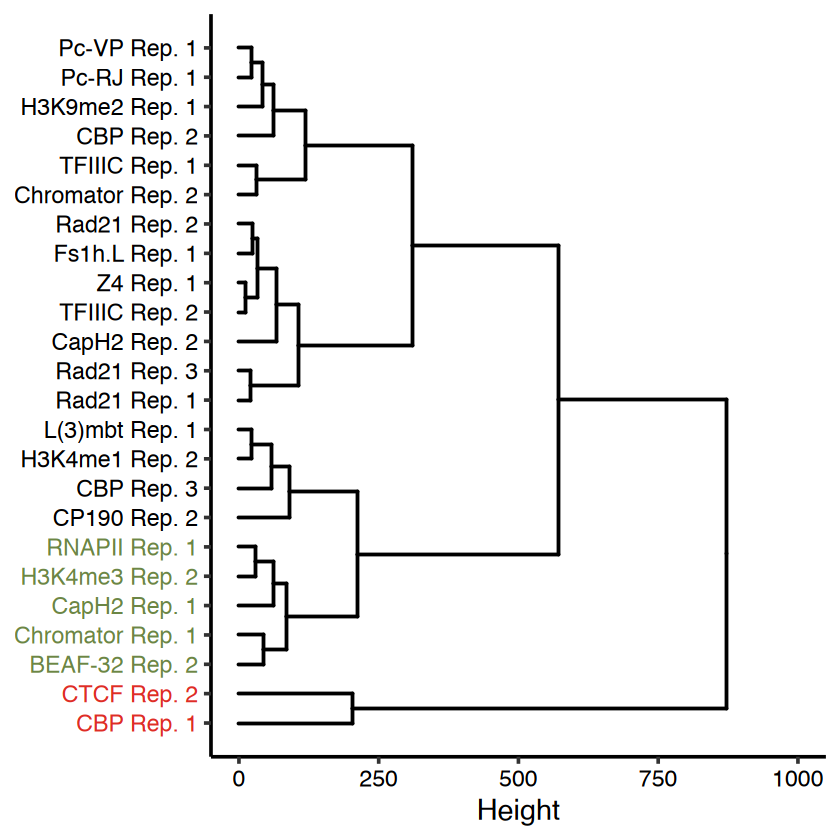

In [25]:
dd <- ggdendrogram(h, rotate = TRUE)+
    theme_classic(base_size = 17)+
    ylab('Height')+xlab(NULL)+ylim(0,1000)+
    #scale_y_discrete(labels=c("Tryptophan" = expression(bold("CTCF Rep. 2")), parse=TRUE))+
    theme(axis.text.x=element_text(colour="black"), axis.text.y=element_text(colour=color_mask, face = face_mask),
         #panel.background = element_rect(fill='transparent'), #transparent panel bg
         #plot.background = element_rect(fill='transparent', color=NA), #transparent plot bg
         panel.grid.major = element_blank(), #remove major gridlines
         panel.grid.minor = element_blank(), #remove minor gridlines
         legend.background = element_rect(fill='transparent'), #transparent legend bg
         legend.box.background = element_rect(fill='transparent') #transparent legend panel
    )

dd$layers[[2]]$aes_params$size <- 0.8
dd$layers[[2]]$geom_params$lineend <- "round"
dd